In [41]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [42]:
# Load the data
df = pd.read_csv("C:\\Desktop\\Stock\\nepsealpha_export_price_NEPSE_2019-08-18_2024-08-18.csv")

In [43]:
# Data Cleaning
df.dropna(inplace=True)

# Remove commas from numeric columns and convert them to float
df.replace(',', '', regex=True, inplace=True)

In [44]:
# Convert relevant columns to numeric (assuming they might have been strings due to commas)
df['Open'] = pd.to_numeric(df['Open'], errors='coerce')
df['High'] = pd.to_numeric(df['High'], errors='coerce')
df['Low'] = pd.to_numeric(df['Low'], errors='coerce')
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')


In [45]:
# Drop any rows where conversion failed
df.dropna(inplace=True)

# Convert 'Date' to datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

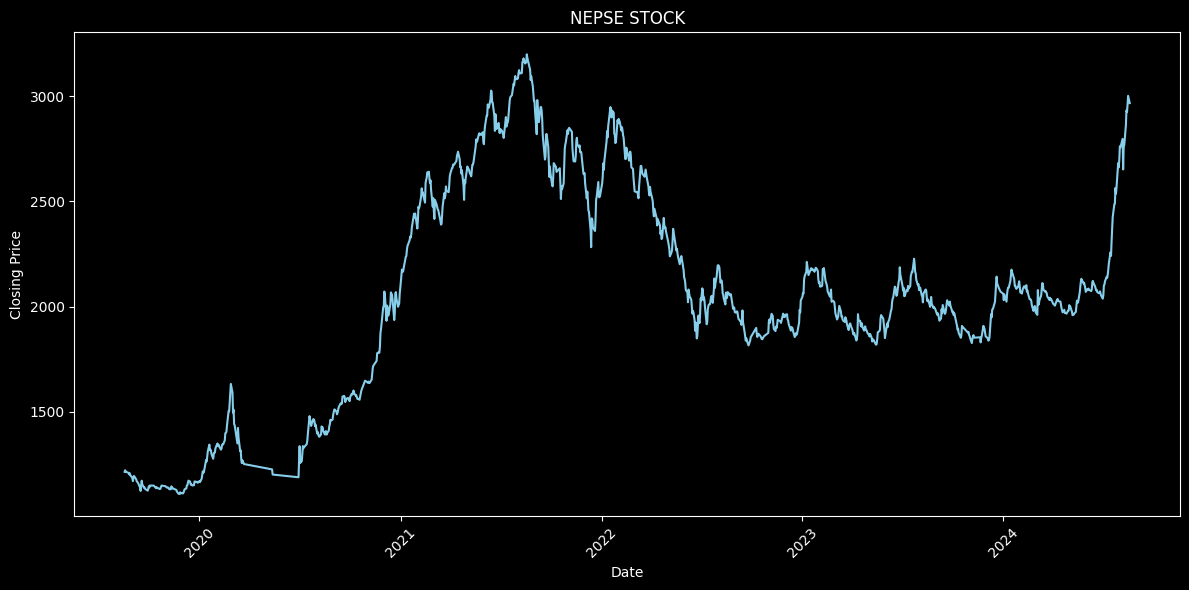

In [46]:
# Ensure there are no duplicate indices
df = df.loc[~df.index.duplicated(keep='first')]

# Visualization I - NEPSE Stock Price Over Time
plt.style.use('dark_background')
plt.figure(figsize=(12, 6), facecolor='black')
plt.plot(df.index, df['Close'], color='skyblue')
plt.title('NEPSE STOCK', color='white')
plt.xlabel('Date', color='white')
plt.ylabel('Closing Price', color='white')
plt.xticks(rotation=45, color='white')
plt.tight_layout()
plt.show()

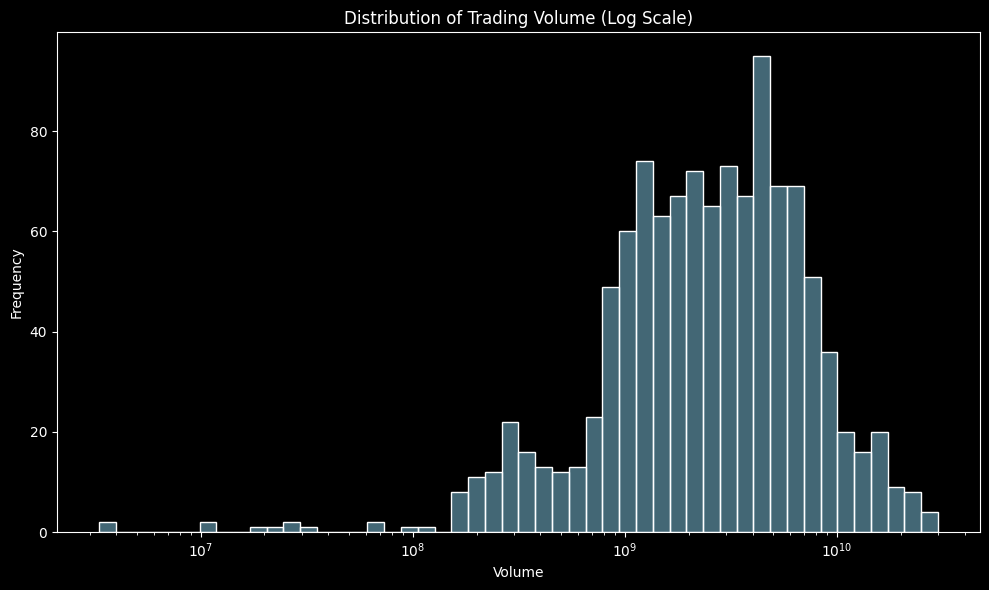

In [47]:
# Visualization II - Distribution of Trading Volume with Log Scale
plt.figure(figsize=(10, 6))
sns.histplot(df['Volume'], bins=50, kde=True, color='skyblue', log_scale=(True, False))
plt.title('Distribution of Trading Volume (Log Scale)')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

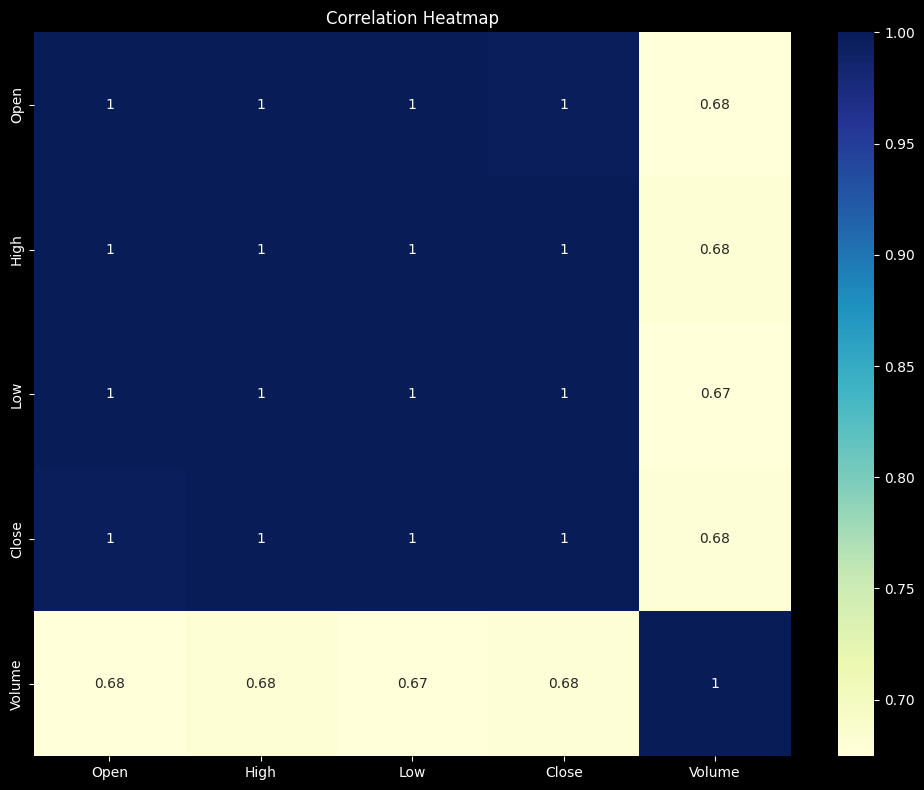

In [48]:
# Visualization III - Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

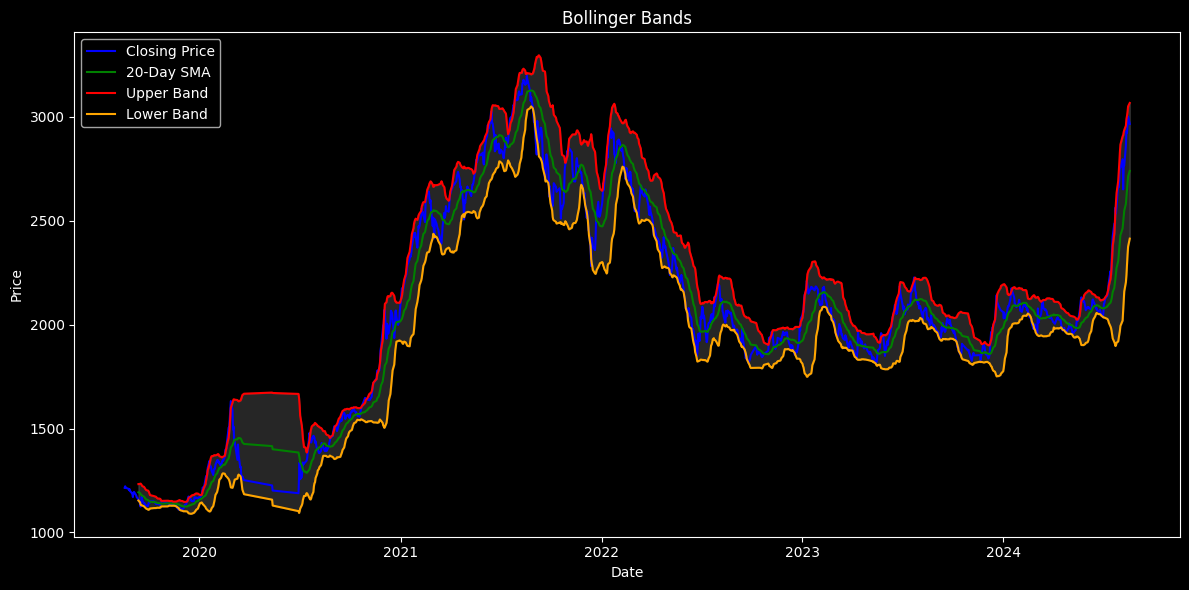

In [49]:
# Visualization IV - Bollinger Bands
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['Upper Band'] = df['SMA20'] + (df['Close'].rolling(window=20).std() * 2)
df['Lower Band'] = df['SMA20'] - (df['Close'].rolling(window=20).std() * 2)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], color='blue', label='Closing Price')
plt.plot(df.index, df['SMA20'], color='green', label='20-Day SMA')
plt.plot(df.index, df['Upper Band'], color='red', label='Upper Band')
plt.plot(df.index, df['Lower Band'], color='orange', label='Lower Band')
plt.fill_between(df.index, df['Lower Band'], df['Upper Band'], color='gray', alpha=0.3)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()

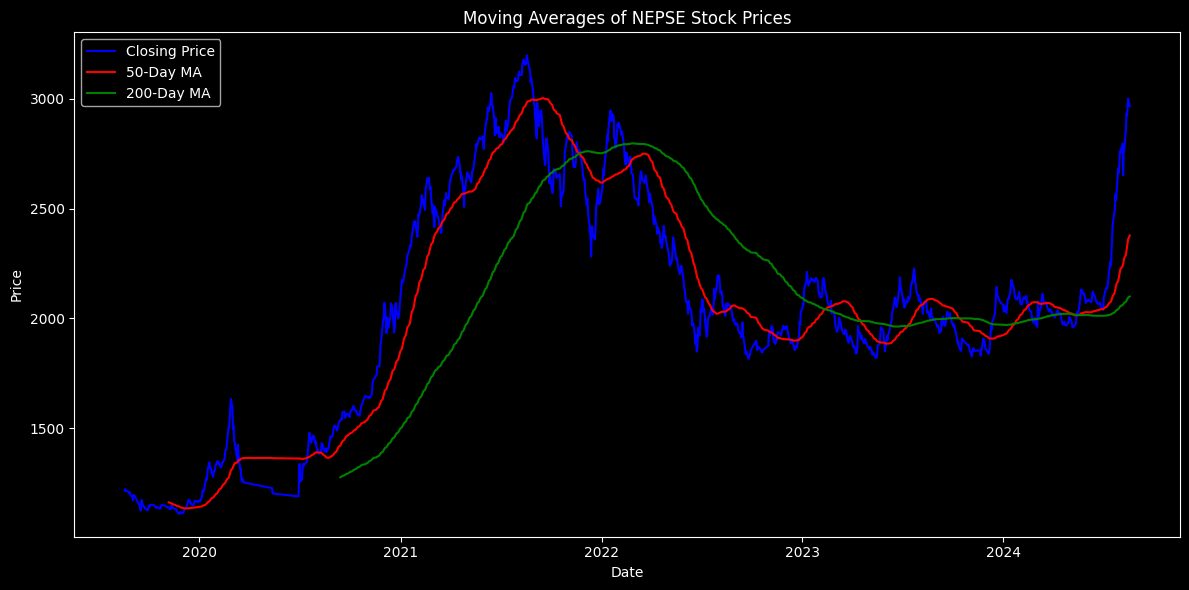

In [50]:
# Moving Averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], color='b', label='Closing Price')
plt.plot(df.index, df['MA50'], color='r', label='50-Day MA')
plt.plot(df.index, df['MA200'], color='g', label='200-Day MA')
plt.title('Moving Averages of NEPSE Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


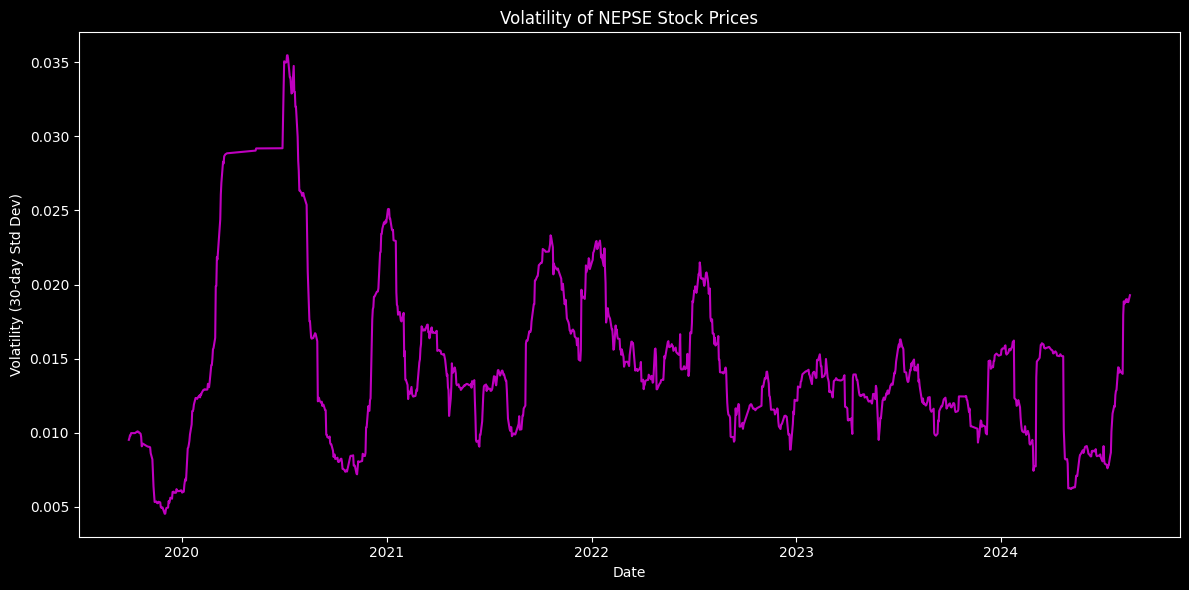

In [51]:
# Volatility Analysis
df['Daily_Return'] = df['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Daily_Return'].rolling(window=30).std(), color='m')
plt.title('Volatility of NEPSE Stock Prices')
plt.xlabel('Date')
plt.ylabel('Volatility (30-day Std Dev)')
plt.tight_layout()
plt.show()

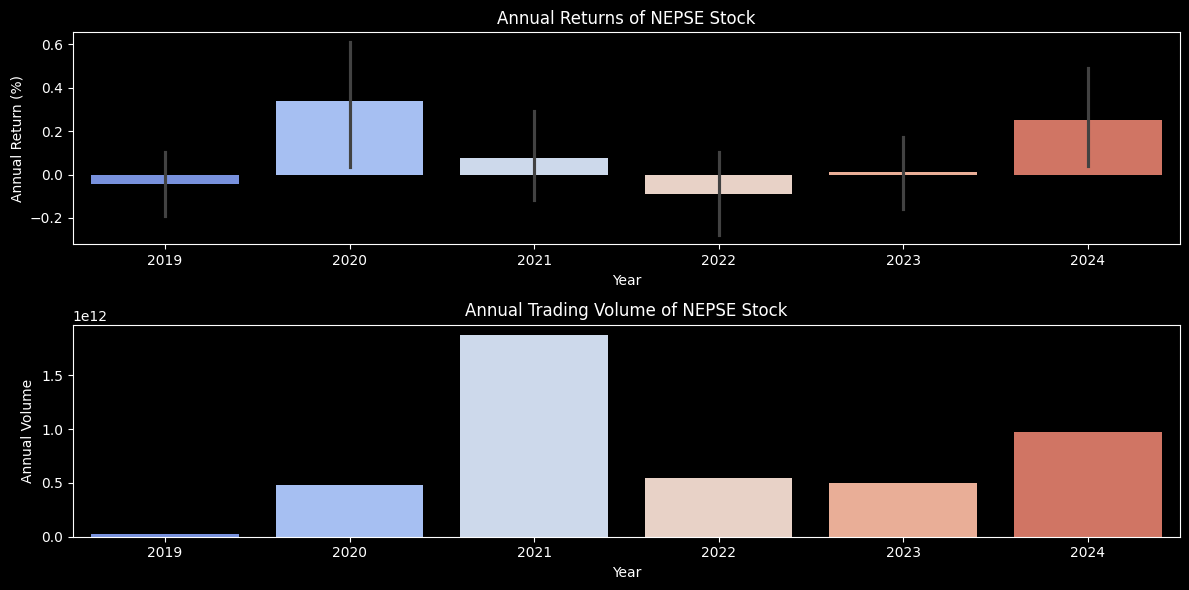

In [52]:
# Annual Trends
df['Year'] = df.index.year
df['Annual_Return'] = df.groupby('Year')['Close'].pct_change() * 100
df['Annual_Volume'] = df.groupby('Year')['Volume'].transform('sum')

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.barplot(data=df, x='Year', y='Annual_Return', palette='coolwarm')
plt.title('Annual Returns of NEPSE Stock')
plt.xlabel('Year')
plt.ylabel('Annual Return (%)')

plt.subplot(2, 1, 2)
sns.barplot(data=df, x='Year', y='Annual_Volume', palette='coolwarm')
plt.title('Annual Trading Volume of NEPSE Stock')
plt.xlabel('Year')
plt.ylabel('Annual Volume')
plt.tight_layout()
plt.show()


In [53]:
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates


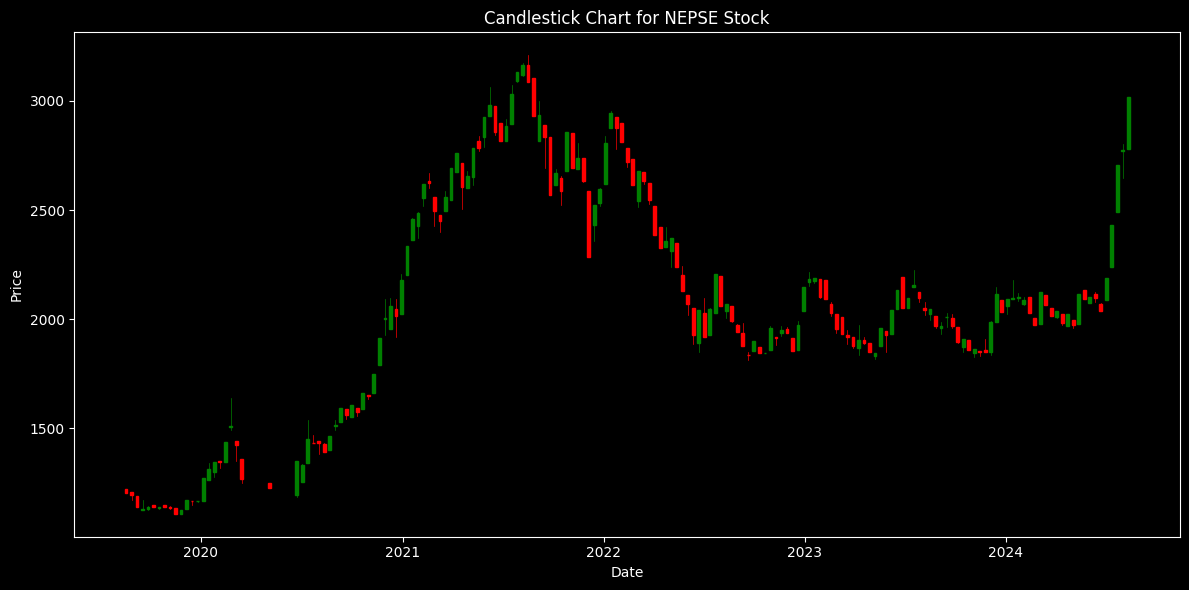

In [54]:
# Candlestick Chart
df_ohlc = df[['Open', 'High', 'Low', 'Close']].resample('10D').ohlc()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

plt.figure(figsize=(12, 6))
ax = plt.subplot()
candlestick_ohlc(ax, df_ohlc.values, width=5, colorup='green', colordown='red')
ax.xaxis_date()
plt.title('Candlestick Chart for NEPSE Stock')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

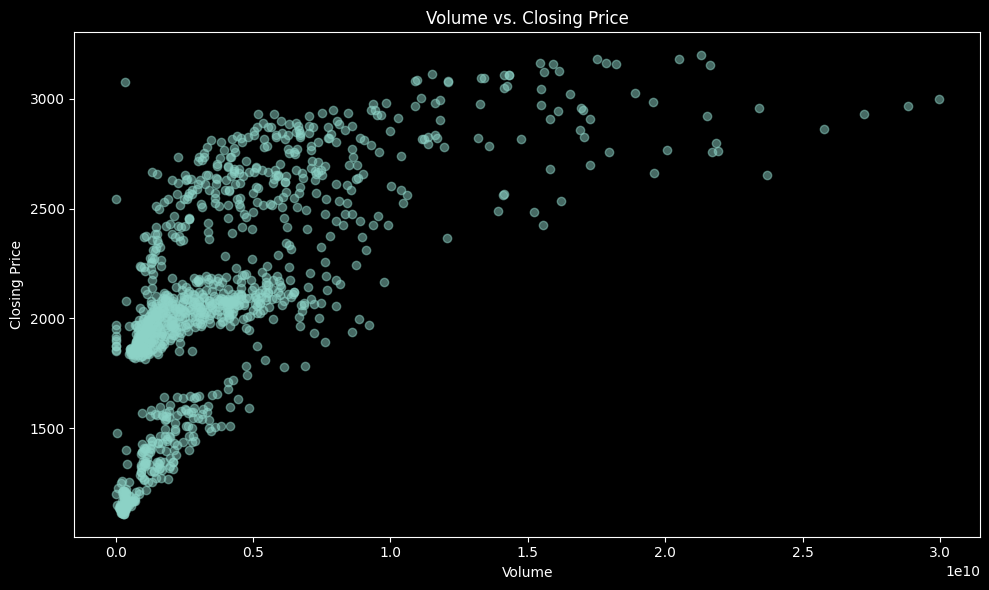

In [55]:
# Volume vs. Price Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()


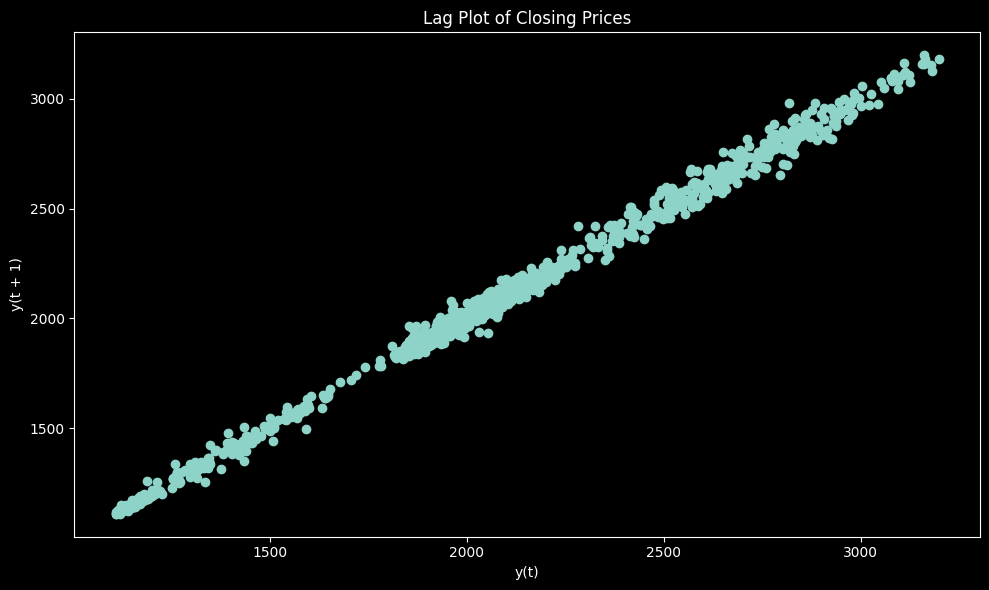

In [56]:
# Lag Plot
plt.figure(figsize=(10, 6))
lag_plot(df['Close'])
plt.title('Lag Plot of Closing Prices')
plt.tight_layout()
plt.show()

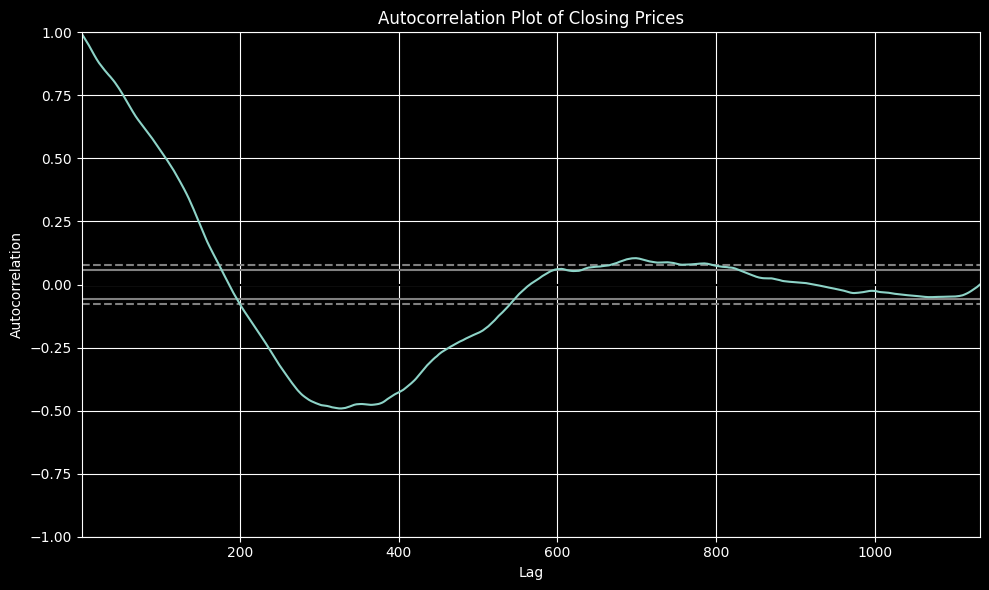

In [57]:
# Autocorrelation Plot
plt.figure(figsize=(10, 6))
autocorrelation_plot(df['Close'])
plt.title('Autocorrelation Plot of Closing Prices')
plt.tight_layout()
plt.show()


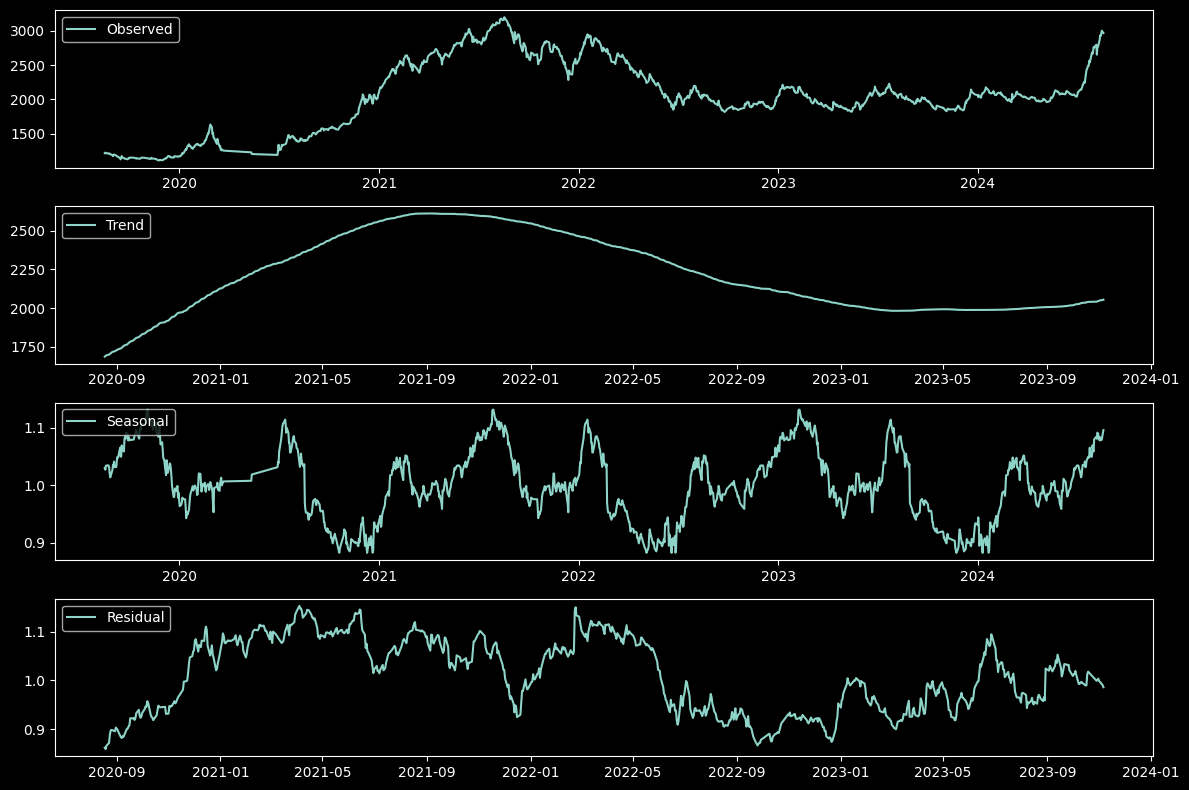

In [58]:
# Seasonality Decomposition
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from statsmodels.tsa.arima.model import ARIMA
import xgboost as xgb

In [71]:
# Prediction - Future Stock Prices
# Feature selection
features = ['Close', 'Volume', 'MA50', 'MA200']
df = df.dropna()  # Drop any remaining NaN values after calculations

In [72]:
# Prepare the dataset for prediction
X = df[features]
y = df['Close'].shift(-1).dropna()
X = X.iloc[:-1]  # Align X and y


In [73]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [74]:
# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [75]:
# Train Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [76]:
# Evaluate models
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))


Linear Regression MAE: 21.139937031695116
Linear Regression MSE: 953.7362514666039
Random Forest MAE: 23.098934473118195
Random Forest MSE: 1073.8369273352703


In [77]:
# Cross-Validation for Random Forest
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_absolute_error')
print("Cross-Validation MAE (Random Forest):", -np.mean(cv_scores))


Cross-Validation MAE (Random Forest): 49.55558282626567


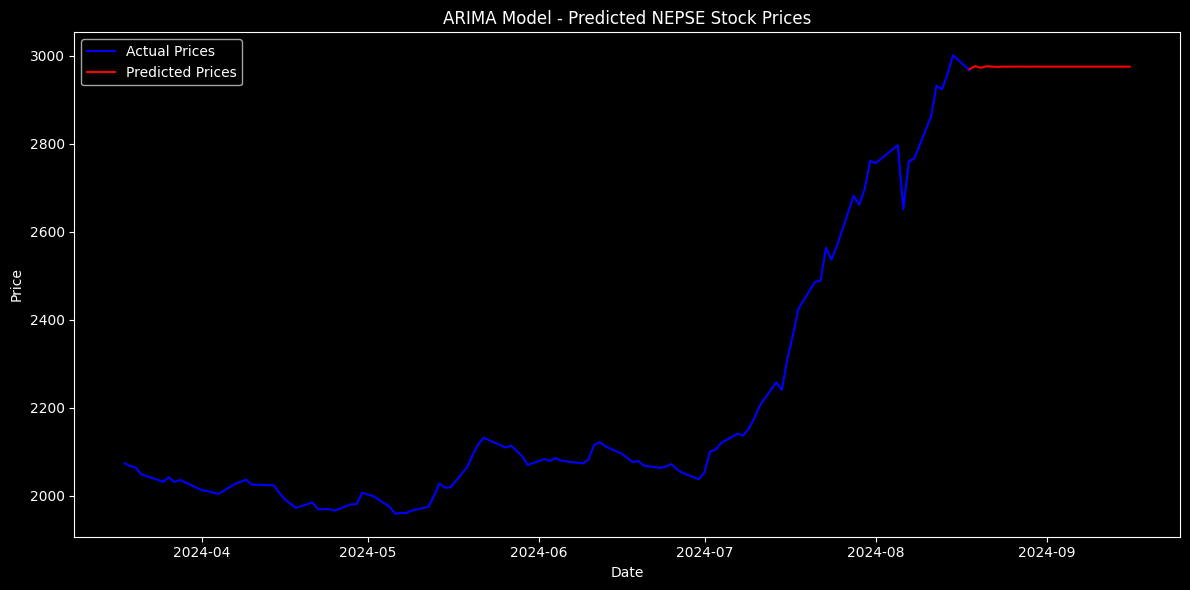

In [78]:
# ARIMA for time series forecasting
model = ARIMA(df['Close'], order=(5, 1, 0))
arima_model = model.fit()
predicted_prices = arima_model.forecast(steps=30)  # Predict the next 30 days

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index[-100:], df['Close'].iloc[-100:], color='blue', label='Actual Prices')
plt.plot(pd.date_range(df.index[-1], periods=30, freq='D'), predicted_prices, color='red', label='Predicted Prices')
plt.title('ARIMA Model - Predicted NEPSE Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()



Linear Regression MAE: 21.139937031695116
Linear Regression MSE: 953.7362514666039


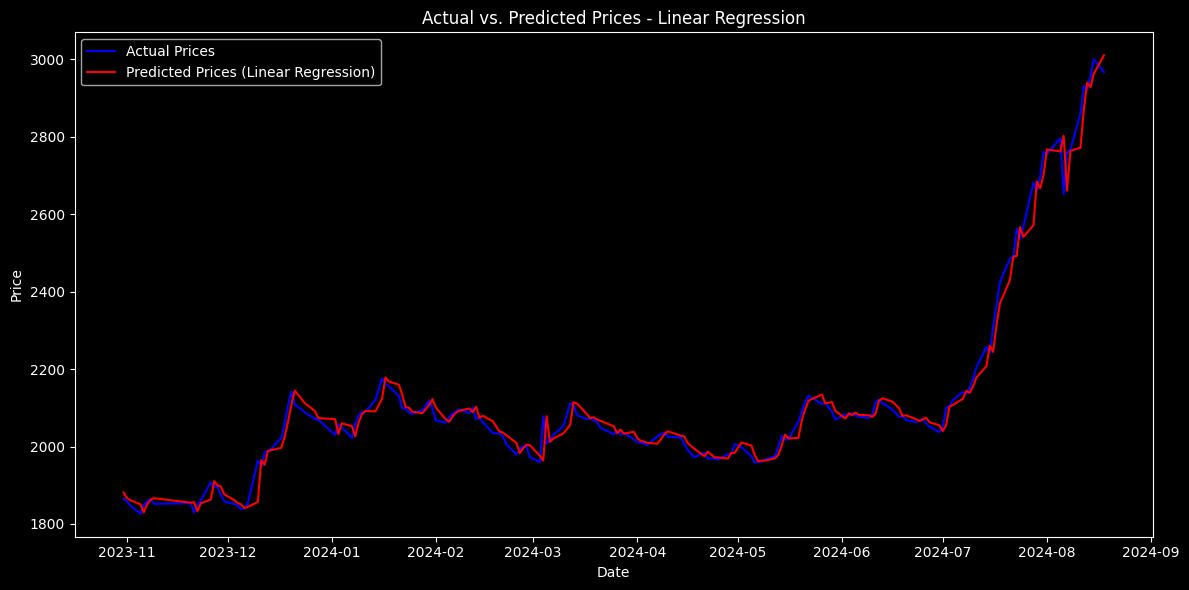

Random Forest MAE: 23.098934473118195
Random Forest MSE: 1073.8369273352703


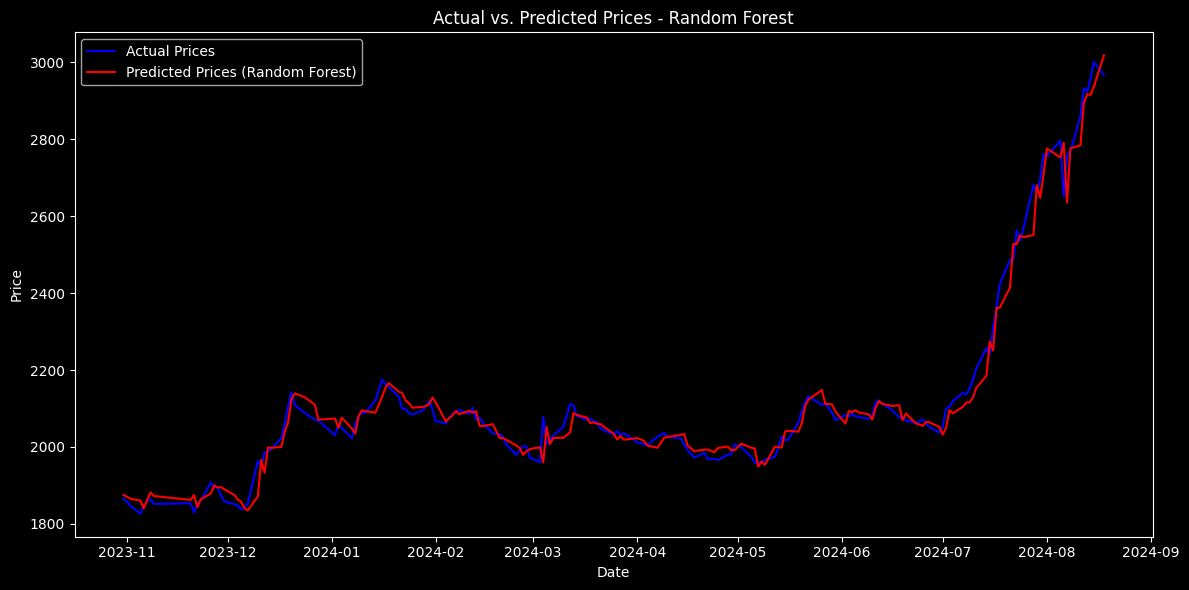

Gradient Boosting MAE: 22.496108038401882
Gradient Boosting MSE: 1011.6285221977532


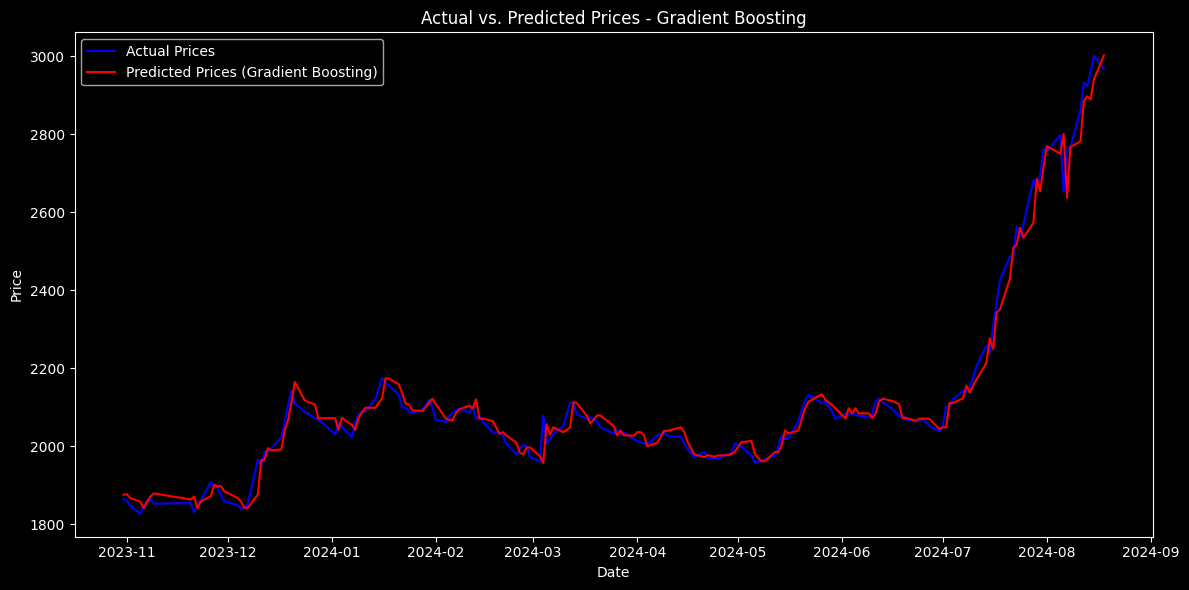

XGBoost MAE: 26.434598244287628
XGBoost MSE: 1362.4945956506726


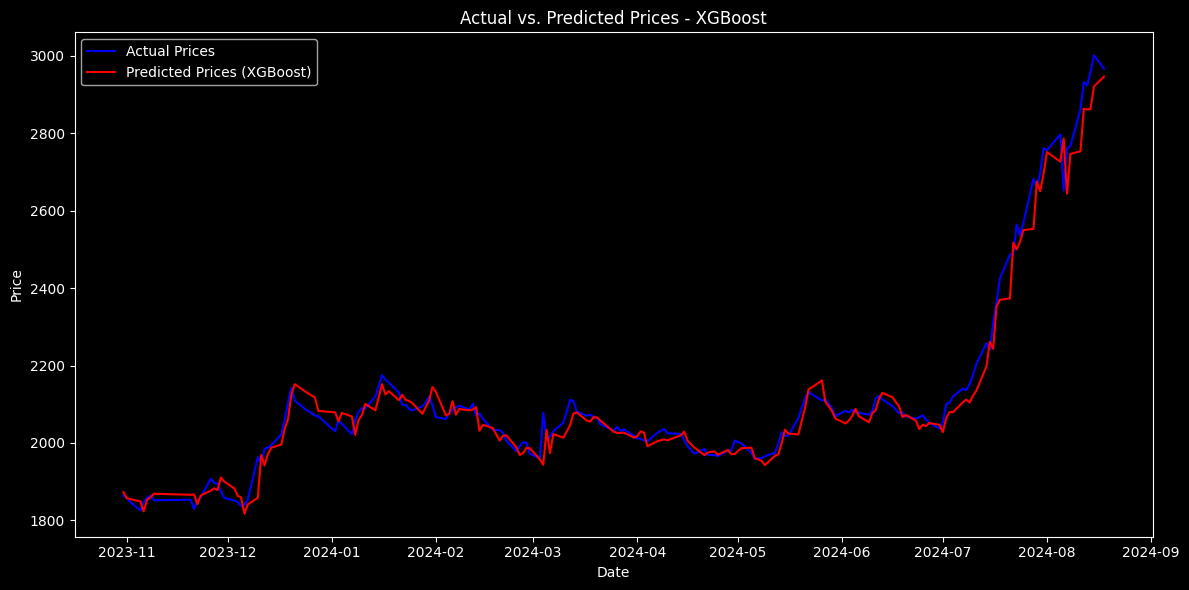

XGBoost Cross-Validation MAE: 56.03257528232731


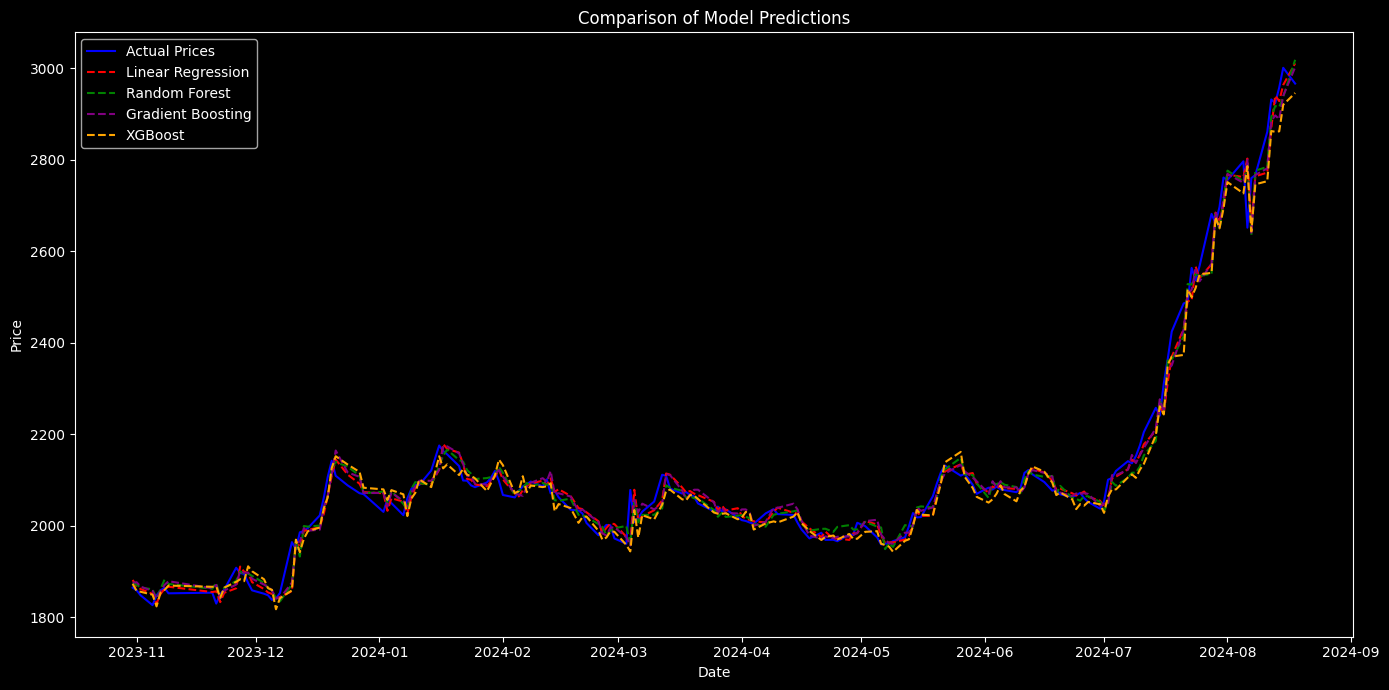

In [80]:
def train_and_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Print evaluation metrics
    print(f'{model_name} MAE: {mae}')
    print(f'{model_name} MSE: {mse}')
    
    # Plot actual vs. predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
    plt.plot(df.index[-len(y_test):], y_pred, label=f'Predicted Prices ({model_name})', color='red')
    plt.title(f'Actual vs. Predicted Prices - {model_name}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return y_pred, mae, mse

# Train and evaluate models

# Linear Regression
lr = LinearRegression()
y_pred_lr, mae_lr, mse_lr = train_and_evaluate_model(lr, 'Linear Regression')

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
y_pred_rf, mae_rf, mse_rf = train_and_evaluate_model(rf, 'Random Forest')

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
y_pred_gb, mae_gb, mse_gb = train_and_evaluate_model(gb, 'Gradient Boosting')

# XGBoost
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
y_pred_xgb, mae_xgb, mse_xgb = train_and_evaluate_model(xgboost_model, 'XGBoost')

# Cross-Validation Scores for XGBoost
cv_scores = cross_val_score(xgboost_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'XGBoost Cross-Validation MAE: {-np.mean(cv_scores)}')

# Comparison of model predictions
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(df.index[-len(y_test):], y_pred_lr, label='Linear Regression', color='red', linestyle='--')
plt.plot(df.index[-len(y_test):], y_pred_rf, label='Random Forest', color='green', linestyle='--')
plt.plot(df.index[-len(y_test):], y_pred_gb, label='Gradient Boosting', color='purple', linestyle='--')
plt.plot(df.index[-len(y_test):], y_pred_xgb, label='XGBoost', color='orange', linestyle='--')
plt.title('Comparison of Model Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()
 